In [301]:
#Import All Important Libraries
import librosa
import soundfile
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [302]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
from numpy import array
from numpy import hstack
import pandas as pd
import math

In [303]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import pandas as pd

In [304]:
base = pd.read_csv('smpl_interval_200_adjusted_emotions.csv')

In [305]:
base

,x,y,timestamp,deathCount,shootsCounter,hitCounter,collectedMoney,collectedHealth,idOfSound,timestampOfSound,...,yMax,activityLabel,ANGER,CONTEMPT,FEAR,DISGUST,HAPPINESS,NEUTRAL,SADNESS,SURPRISE
0,0.350000,1.890000,1.580129e+12,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,4.925414,3,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0
1,0.350000,1.890000,1.580129e+12,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,4.925414,3,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0
2,0.350000,1.890000,1.580129e+12,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,4.925414,3,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0
3,0.350000,1.890000,1.580129e+12,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,4.925414,3,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0
4,0.350000,1.890000,1.580129e+12,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,4.925414,3,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1761,23.086845,18.141167,1.580129e+12,5.0,309.0,101.0,62.0,19.0,601.0,27.01.2020 13:46:23,...,21.176580,4,0.0,0.002,0.0,0.0,0.998,0.0,0.0,0.0
1762,23.086845,18.141167,1.580129e+12,5.0,309.0,101.0,62.0,19.0,601.0,27.01.2020 13:46:23,...,21.176580,4,0.0,0.002,0.0,0.0,0.998,0.0,0.0,0.0
1763,23.086845,18.141167,1.580129e+12,5.0,309.0,101.0,62.0,19.0,601.0,27.01.2020 13:46:23,...,21.176580,4,0.0,0.001,0.0,0.0,0.999,0.0,0.0,0.0
1764,23.086845,18.141167,1.580129e+12,5.0,309.0,101.0,62.0,19.0,601.0,27.01.2020 13:46:23,...,21.176580,4,0.0,0.002,0.0,0.0,0.998,0.0,0.0,0.0


In [306]:
base_adjusted = base.drop(columns = ['idOfSound','timestamp','timestampOfSound',])

In [307]:
base_adjusted = base_adjusted.dropna()

In [308]:
base_adjusted

,x,y,deathCount,shootsCounter,hitCounter,collectedMoney,collectedHealth,xMin,yMin,xMax,yMax,activityLabel,ANGER,CONTEMPT,FEAR,DISGUST,HAPPINESS,NEUTRAL,SADNESS,SURPRISE
0,0.350000,1.890000,0.0,0.0,0.0,0.0,0.0,-5.028513,-1.125414,5.728513,4.925414,3,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0
1,0.350000,1.890000,0.0,0.0,0.0,0.0,0.0,-5.028513,-1.125414,5.728513,4.925414,3,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0
2,0.350000,1.890000,0.0,0.0,0.0,0.0,0.0,-5.028513,-1.125414,5.728513,4.925414,3,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0
3,0.350000,1.890000,0.0,0.0,0.0,0.0,0.0,-5.028513,-1.125414,5.728513,4.925414,3,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0
4,0.350000,1.890000,0.0,0.0,0.0,0.0,0.0,-5.028513,-1.125414,5.728513,4.925414,3,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1761,23.086845,18.141167,5.0,309.0,101.0,62.0,19.0,17.708334,15.125753,28.465357,21.176580,4,0.0,0.002,0.0,0.0,0.998,0.0,0.0,0.0
1762,23.086845,18.141167,5.0,309.0,101.0,62.0,19.0,17.708334,15.125753,28.465357,21.176580,4,0.0,0.002,0.0,0.0,0.998,0.0,0.0,0.0
1763,23.086845,18.141167,5.0,309.0,101.0,62.0,19.0,17.708334,15.125753,28.465357,21.176580,4,0.0,0.001,0.0,0.0,0.999,0.0,0.0,0.0
1764,23.086845,18.141167,5.0,309.0,101.0,62.0,19.0,17.708334,15.125753,28.465357,21.176580,4,0.0,0.002,0.0,0.0,0.998,0.0,0.0,0.0


In [309]:
#Splitting the data up
act_train_base = base_adjusted['activityLabel'][:math.floor(base_adjusted.shape[0]*0.8)]
act_val_base = base_adjusted['activityLabel'][math.floor(base_adjusted.shape[0]*0.8):]

In [310]:
#Removing the output feature
base_input = base_adjusted.drop(columns = ['activityLabel'])

In [311]:
base_train = base_input.loc[:math.floor(base_input.shape[0]*0.8)-1,:]
base_val = base_input.loc[math.floor(base_input.shape[0]*0.8):,:]

In [312]:
train_X = base_train.values.reshape(base_train.shape[0],1,base_train.shape[1])
test_X = base_val.values.reshape(base_val.shape[0],1,base_val.shape[1])
    
trY = act_train_base.values
teY = act_val_base.values

In [313]:
from keras.utils import to_categorical

In [314]:
train_X.shape

(1402, 1, 19)

In [315]:
trY_ = trY[:1402]

In [316]:
trY_.shape

(1402,)

In [317]:
test_X.shape

(358, 1, 19)

In [318]:
test_X_ = test_X[:352]

In [319]:
test_X_.shape

(352, 1, 19)

In [320]:
teY.shape

(352,)

In [321]:
#Shifting the activity labels to categorical data
train_Y = to_categorical(trY_)
test_Y = to_categorical(teY)

In [322]:
train_Y.shape

(1402, 5)

In [323]:
test_Y.shape

(352, 5)

In [324]:
from keras import callbacks
from keras import optimizers

In [325]:
#Seting the learning rate using the adam optimizetr, 0.000001
adam = optimizers.Adam(learning_rate = 0.00001,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False)

In [326]:
callback = callbacks.EarlyStopping(monitor='val_loss',patience=100,mode='auto')

In [327]:
tensor = Sequential()
tensor.add(LSTM(19, input_shape=(train_X.shape[1], train_X.shape[2]))) #input Layer
tensor.add(Dense(5,activation = 'softmax'))
tensor.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])#output layer

In [328]:
history = tensor.fit(train_X,train_Y, epochs=10000, verbose=2, shuffle=False,validation_data = (test_X_,test_Y),callbacks=[callback],batch_size = 30)

Train on 1402 samples, validate on 352 samples
Epoch 1/10000
 - 1s - loss: 1.6549 - accuracy: 0.1127 - val_loss: 1.7214 - val_accuracy: 0.1023
Epoch 2/10000
 - 0s - loss: 1.6523 - accuracy: 0.1127 - val_loss: 1.7198 - val_accuracy: 0.1023
Epoch 3/10000
 - 0s - loss: 1.6498 - accuracy: 0.1134 - val_loss: 1.7183 - val_accuracy: 0.1023
Epoch 4/10000
 - 0s - loss: 1.6472 - accuracy: 0.1141 - val_loss: 1.7168 - val_accuracy: 0.1023
Epoch 5/10000
 - 0s - loss: 1.6447 - accuracy: 0.1148 - val_loss: 1.7153 - val_accuracy: 0.1023
Epoch 6/10000
 - 0s - loss: 1.6421 - accuracy: 0.1148 - val_loss: 1.7138 - val_accuracy: 0.1023
Epoch 7/10000
 - 0s - loss: 1.6396 - accuracy: 0.1163 - val_loss: 1.7123 - val_accuracy: 0.1023
Epoch 8/10000
 - 0s - loss: 1.6371 - accuracy: 0.1163 - val_loss: 1.7108 - val_accuracy: 0.1023
Epoch 9/10000
 - 0s - loss: 1.6346 - accuracy: 0.1184 - val_loss: 1.7093 - val_accuracy: 0.1023
Epoch 10/10000
 - 0s - loss: 1.6321 - accuracy: 0.1220 - val_loss: 1.7079 - val_accuracy:

 - 0s - loss: 1.4696 - accuracy: 0.3160 - val_loss: 1.6055 - val_accuracy: 0.1023
Epoch 86/10000
 - 0s - loss: 1.4676 - accuracy: 0.3167 - val_loss: 1.6042 - val_accuracy: 0.1023
Epoch 87/10000
 - 0s - loss: 1.4656 - accuracy: 0.3181 - val_loss: 1.6030 - val_accuracy: 0.1023
Epoch 88/10000
 - 0s - loss: 1.4636 - accuracy: 0.3217 - val_loss: 1.6017 - val_accuracy: 0.1023
Epoch 89/10000
 - 0s - loss: 1.4616 - accuracy: 0.3245 - val_loss: 1.6005 - val_accuracy: 0.1023
Epoch 90/10000
 - 0s - loss: 1.4596 - accuracy: 0.3260 - val_loss: 1.5993 - val_accuracy: 0.1023
Epoch 91/10000
 - 0s - loss: 1.4577 - accuracy: 0.3345 - val_loss: 1.5980 - val_accuracy: 0.1023
Epoch 92/10000
 - 0s - loss: 1.4557 - accuracy: 0.3388 - val_loss: 1.5968 - val_accuracy: 0.1023
Epoch 93/10000
 - 0s - loss: 1.4537 - accuracy: 0.3402 - val_loss: 1.5956 - val_accuracy: 0.1023
Epoch 94/10000
 - 0s - loss: 1.4517 - accuracy: 0.3409 - val_loss: 1.5943 - val_accuracy: 0.1023
Epoch 95/10000
 - 0s - loss: 1.4498 - accurac

Epoch 169/10000
 - 0s - loss: 1.2945 - accuracy: 0.5521 - val_loss: 1.5122 - val_accuracy: 0.1023
Epoch 170/10000
 - 0s - loss: 1.2925 - accuracy: 0.5649 - val_loss: 1.5112 - val_accuracy: 0.1023
Epoch 171/10000
 - 0s - loss: 1.2904 - accuracy: 0.5728 - val_loss: 1.5102 - val_accuracy: 0.1023
Epoch 172/10000
 - 0s - loss: 1.2884 - accuracy: 0.5720 - val_loss: 1.5092 - val_accuracy: 0.1023
Epoch 173/10000
 - 0s - loss: 1.2864 - accuracy: 0.5706 - val_loss: 1.5081 - val_accuracy: 0.1023
Epoch 174/10000
 - 0s - loss: 1.2843 - accuracy: 0.5913 - val_loss: 1.5070 - val_accuracy: 0.1023
Epoch 175/10000
 - 0s - loss: 1.2823 - accuracy: 0.6148 - val_loss: 1.5058 - val_accuracy: 0.1023
Epoch 176/10000
 - 0s - loss: 1.2802 - accuracy: 0.6098 - val_loss: 1.5046 - val_accuracy: 0.1023
Epoch 177/10000
 - 0s - loss: 1.2781 - accuracy: 0.6134 - val_loss: 1.5033 - val_accuracy: 0.1023
Epoch 178/10000
 - 0s - loss: 1.2761 - accuracy: 0.6148 - val_loss: 1.5018 - val_accuracy: 0.1023
Epoch 179/10000
 - 0

Epoch 253/10000
 - 0s - loss: 1.1454 - accuracy: 0.6412 - val_loss: 1.3450 - val_accuracy: 0.1960
Epoch 254/10000
 - 0s - loss: 1.1440 - accuracy: 0.6412 - val_loss: 1.3443 - val_accuracy: 0.1960
Epoch 255/10000
 - 0s - loss: 1.1426 - accuracy: 0.6412 - val_loss: 1.3435 - val_accuracy: 0.1960
Epoch 256/10000
 - 0s - loss: 1.1413 - accuracy: 0.6412 - val_loss: 1.3427 - val_accuracy: 0.1960
Epoch 257/10000
 - 0s - loss: 1.1399 - accuracy: 0.6419 - val_loss: 1.3419 - val_accuracy: 0.1960
Epoch 258/10000
 - 0s - loss: 1.1386 - accuracy: 0.6419 - val_loss: 1.3412 - val_accuracy: 0.1960
Epoch 259/10000
 - 0s - loss: 1.1373 - accuracy: 0.6419 - val_loss: 1.3404 - val_accuracy: 0.1960
Epoch 260/10000
 - 0s - loss: 1.1360 - accuracy: 0.6419 - val_loss: 1.3397 - val_accuracy: 0.1960
Epoch 261/10000
 - 0s - loss: 1.1347 - accuracy: 0.6419 - val_loss: 1.3390 - val_accuracy: 0.1960
Epoch 262/10000
 - 0s - loss: 1.1335 - accuracy: 0.6419 - val_loss: 1.3383 - val_accuracy: 0.1960
Epoch 263/10000
 - 0

Epoch 337/10000
 - 0s - loss: 1.0553 - accuracy: 0.6441 - val_loss: 1.2514 - val_accuracy: 0.3097
Epoch 338/10000
 - 0s - loss: 1.0544 - accuracy: 0.6441 - val_loss: 1.2483 - val_accuracy: 0.3125
Epoch 339/10000
 - 0s - loss: 1.0534 - accuracy: 0.6441 - val_loss: 1.2452 - val_accuracy: 0.3182
Epoch 340/10000
 - 0s - loss: 1.0525 - accuracy: 0.6441 - val_loss: 1.2419 - val_accuracy: 0.3267
Epoch 341/10000
 - 0s - loss: 1.0515 - accuracy: 0.6441 - val_loss: 1.2385 - val_accuracy: 0.3381
Epoch 342/10000
 - 0s - loss: 1.0506 - accuracy: 0.6441 - val_loss: 1.2351 - val_accuracy: 0.3608
Epoch 343/10000
 - 0s - loss: 1.0496 - accuracy: 0.6441 - val_loss: 1.2316 - val_accuracy: 0.3920
Epoch 344/10000
 - 0s - loss: 1.0487 - accuracy: 0.6441 - val_loss: 1.2281 - val_accuracy: 0.4091
Epoch 345/10000
 - 0s - loss: 1.0478 - accuracy: 0.6441 - val_loss: 1.2245 - val_accuracy: 0.4290
Epoch 346/10000
 - 0s - loss: 1.0468 - accuracy: 0.6434 - val_loss: 1.2211 - val_accuracy: 0.4375
Epoch 347/10000
 - 0

Epoch 421/10000
 - 0s - loss: 0.9889 - accuracy: 0.6541 - val_loss: 1.1340 - val_accuracy: 0.6562
Epoch 422/10000
 - 0s - loss: 0.9883 - accuracy: 0.6541 - val_loss: 1.1336 - val_accuracy: 0.6562
Epoch 423/10000
 - 0s - loss: 0.9876 - accuracy: 0.6541 - val_loss: 1.1333 - val_accuracy: 0.6562
Epoch 424/10000
 - 0s - loss: 0.9870 - accuracy: 0.6541 - val_loss: 1.1329 - val_accuracy: 0.6562
Epoch 425/10000
 - 0s - loss: 0.9864 - accuracy: 0.6541 - val_loss: 1.1326 - val_accuracy: 0.6591
Epoch 426/10000
 - 0s - loss: 0.9858 - accuracy: 0.6541 - val_loss: 1.1323 - val_accuracy: 0.6591
Epoch 427/10000
 - 0s - loss: 0.9851 - accuracy: 0.6541 - val_loss: 1.1319 - val_accuracy: 0.6591
Epoch 428/10000
 - 0s - loss: 0.9845 - accuracy: 0.6541 - val_loss: 1.1316 - val_accuracy: 0.6591
Epoch 429/10000
 - 0s - loss: 0.9839 - accuracy: 0.6541 - val_loss: 1.1313 - val_accuracy: 0.6591
Epoch 430/10000
 - 0s - loss: 0.9833 - accuracy: 0.6541 - val_loss: 1.1310 - val_accuracy: 0.6591
Epoch 431/10000
 - 0

Epoch 505/10000
 - 0s - loss: 0.9431 - accuracy: 0.6569 - val_loss: 1.1097 - val_accuracy: 0.6619
Epoch 506/10000
 - 0s - loss: 0.9426 - accuracy: 0.6576 - val_loss: 1.1095 - val_accuracy: 0.6619
Epoch 507/10000
 - 0s - loss: 0.9422 - accuracy: 0.6576 - val_loss: 1.1093 - val_accuracy: 0.6619
Epoch 508/10000
 - 0s - loss: 0.9417 - accuracy: 0.6583 - val_loss: 1.1091 - val_accuracy: 0.6619
Epoch 509/10000
 - 0s - loss: 0.9413 - accuracy: 0.6583 - val_loss: 1.1089 - val_accuracy: 0.6648
Epoch 510/10000
 - 0s - loss: 0.9408 - accuracy: 0.6583 - val_loss: 1.1088 - val_accuracy: 0.6648
Epoch 511/10000
 - 0s - loss: 0.9403 - accuracy: 0.6583 - val_loss: 1.1086 - val_accuracy: 0.6648
Epoch 512/10000
 - 0s - loss: 0.9399 - accuracy: 0.6583 - val_loss: 1.1085 - val_accuracy: 0.6648
Epoch 513/10000
 - 0s - loss: 0.9394 - accuracy: 0.6583 - val_loss: 1.1083 - val_accuracy: 0.6648
Epoch 514/10000
 - 0s - loss: 0.9390 - accuracy: 0.6583 - val_loss: 1.1082 - val_accuracy: 0.6648
Epoch 515/10000
 - 0

Epoch 589/10000
 - 0s - loss: 0.9089 - accuracy: 0.6591 - val_loss: 1.1077 - val_accuracy: 0.6705
Epoch 590/10000
 - 0s - loss: 0.9085 - accuracy: 0.6605 - val_loss: 1.1076 - val_accuracy: 0.6705
Epoch 591/10000
 - 0s - loss: 0.9082 - accuracy: 0.6605 - val_loss: 1.1075 - val_accuracy: 0.6705
Epoch 592/10000
 - 0s - loss: 0.9078 - accuracy: 0.6605 - val_loss: 1.1073 - val_accuracy: 0.6705
Epoch 593/10000
 - 0s - loss: 0.9074 - accuracy: 0.6605 - val_loss: 1.1072 - val_accuracy: 0.6705
Epoch 594/10000
 - 0s - loss: 0.9071 - accuracy: 0.6605 - val_loss: 1.1070 - val_accuracy: 0.6705
Epoch 595/10000
 - 0s - loss: 0.9067 - accuracy: 0.6605 - val_loss: 1.1069 - val_accuracy: 0.6705
Epoch 596/10000
 - 0s - loss: 0.9063 - accuracy: 0.6605 - val_loss: 1.1067 - val_accuracy: 0.6705
Epoch 597/10000
 - 0s - loss: 0.9060 - accuracy: 0.6605 - val_loss: 1.1065 - val_accuracy: 0.6705
Epoch 598/10000
 - 0s - loss: 0.9056 - accuracy: 0.6605 - val_loss: 1.1063 - val_accuracy: 0.6705
Epoch 599/10000
 - 0

Epoch 673/10000
 - 0s - loss: 0.8823 - accuracy: 0.6598 - val_loss: 1.0977 - val_accuracy: 0.6705
Epoch 674/10000
 - 0s - loss: 0.8820 - accuracy: 0.6598 - val_loss: 1.0978 - val_accuracy: 0.6705
Epoch 675/10000
 - 0s - loss: 0.8817 - accuracy: 0.6598 - val_loss: 1.0979 - val_accuracy: 0.6705
Epoch 676/10000
 - 0s - loss: 0.8815 - accuracy: 0.6598 - val_loss: 1.0979 - val_accuracy: 0.6705
Epoch 677/10000
 - 0s - loss: 0.8812 - accuracy: 0.6598 - val_loss: 1.0980 - val_accuracy: 0.6705
Epoch 678/10000
 - 0s - loss: 0.8810 - accuracy: 0.6598 - val_loss: 1.0980 - val_accuracy: 0.6705
Epoch 679/10000
 - 0s - loss: 0.8807 - accuracy: 0.6598 - val_loss: 1.0980 - val_accuracy: 0.6705
Epoch 680/10000
 - 0s - loss: 0.8805 - accuracy: 0.6598 - val_loss: 1.0980 - val_accuracy: 0.6705
Epoch 681/10000
 - 0s - loss: 0.8802 - accuracy: 0.6598 - val_loss: 1.0979 - val_accuracy: 0.6705
Epoch 682/10000
 - 0s - loss: 0.8800 - accuracy: 0.6598 - val_loss: 1.0979 - val_accuracy: 0.6705
Epoch 683/10000
 - 0

Epoch 757/10000
 - 0s - loss: 0.8626 - accuracy: 0.6655 - val_loss: 1.0787 - val_accuracy: 0.6733
Epoch 758/10000
 - 0s - loss: 0.8624 - accuracy: 0.6655 - val_loss: 1.0785 - val_accuracy: 0.6733
Epoch 759/10000
 - 0s - loss: 0.8622 - accuracy: 0.6655 - val_loss: 1.0783 - val_accuracy: 0.6733
Epoch 760/10000
 - 0s - loss: 0.8620 - accuracy: 0.6655 - val_loss: 1.0781 - val_accuracy: 0.6733
Epoch 761/10000
 - 0s - loss: 0.8618 - accuracy: 0.6655 - val_loss: 1.0779 - val_accuracy: 0.6733
Epoch 762/10000
 - 0s - loss: 0.8616 - accuracy: 0.6662 - val_loss: 1.0776 - val_accuracy: 0.6733
Epoch 763/10000
 - 0s - loss: 0.8614 - accuracy: 0.6662 - val_loss: 1.0774 - val_accuracy: 0.6733
Epoch 764/10000
 - 0s - loss: 0.8612 - accuracy: 0.6662 - val_loss: 1.0772 - val_accuracy: 0.6733
Epoch 765/10000
 - 0s - loss: 0.8610 - accuracy: 0.6662 - val_loss: 1.0770 - val_accuracy: 0.6733
Epoch 766/10000
 - 0s - loss: 0.8608 - accuracy: 0.6662 - val_loss: 1.0768 - val_accuracy: 0.6733
Epoch 767/10000
 - 0

Epoch 841/10000
 - 0s - loss: 0.8471 - accuracy: 0.6690 - val_loss: 1.0619 - val_accuracy: 0.6761
Epoch 842/10000
 - 0s - loss: 0.8469 - accuracy: 0.6698 - val_loss: 1.0617 - val_accuracy: 0.6761
Epoch 843/10000
 - 0s - loss: 0.8468 - accuracy: 0.6698 - val_loss: 1.0615 - val_accuracy: 0.6761
Epoch 844/10000
 - 0s - loss: 0.8466 - accuracy: 0.6698 - val_loss: 1.0613 - val_accuracy: 0.6761
Epoch 845/10000
 - 0s - loss: 0.8464 - accuracy: 0.6698 - val_loss: 1.0611 - val_accuracy: 0.6761
Epoch 846/10000
 - 0s - loss: 0.8463 - accuracy: 0.6698 - val_loss: 1.0610 - val_accuracy: 0.6761
Epoch 847/10000
 - 0s - loss: 0.8461 - accuracy: 0.6705 - val_loss: 1.0608 - val_accuracy: 0.6761
Epoch 848/10000
 - 0s - loss: 0.8459 - accuracy: 0.6705 - val_loss: 1.0606 - val_accuracy: 0.6761
Epoch 849/10000
 - 0s - loss: 0.8458 - accuracy: 0.6705 - val_loss: 1.0605 - val_accuracy: 0.6761
Epoch 850/10000
 - 0s - loss: 0.8456 - accuracy: 0.6705 - val_loss: 1.0604 - val_accuracy: 0.6761
Epoch 851/10000
 - 0

Epoch 925/10000
 - 0s - loss: 0.8334 - accuracy: 0.6740 - val_loss: 1.0561 - val_accuracy: 0.6818
Epoch 926/10000
 - 0s - loss: 0.8333 - accuracy: 0.6740 - val_loss: 1.0561 - val_accuracy: 0.6818
Epoch 927/10000
 - 0s - loss: 0.8331 - accuracy: 0.6740 - val_loss: 1.0560 - val_accuracy: 0.6818
Epoch 928/10000
 - 0s - loss: 0.8330 - accuracy: 0.6740 - val_loss: 1.0560 - val_accuracy: 0.6818
Epoch 929/10000
 - 0s - loss: 0.8328 - accuracy: 0.6740 - val_loss: 1.0560 - val_accuracy: 0.6818
Epoch 930/10000
 - 0s - loss: 0.8326 - accuracy: 0.6740 - val_loss: 1.0559 - val_accuracy: 0.6818
Epoch 931/10000
 - 0s - loss: 0.8325 - accuracy: 0.6740 - val_loss: 1.0559 - val_accuracy: 0.6818
Epoch 932/10000
 - 0s - loss: 0.8323 - accuracy: 0.6740 - val_loss: 1.0558 - val_accuracy: 0.6818
Epoch 933/10000
 - 0s - loss: 0.8322 - accuracy: 0.6740 - val_loss: 1.0558 - val_accuracy: 0.6818
Epoch 934/10000
 - 0s - loss: 0.8320 - accuracy: 0.6740 - val_loss: 1.0557 - val_accuracy: 0.6818
Epoch 935/10000
 - 0

Epoch 1009/10000
 - 0s - loss: 0.8215 - accuracy: 0.6769 - val_loss: 1.0525 - val_accuracy: 0.6847
Epoch 1010/10000
 - 0s - loss: 0.8214 - accuracy: 0.6769 - val_loss: 1.0524 - val_accuracy: 0.6847
Epoch 1011/10000
 - 0s - loss: 0.8213 - accuracy: 0.6769 - val_loss: 1.0524 - val_accuracy: 0.6847
Epoch 1012/10000
 - 0s - loss: 0.8212 - accuracy: 0.6769 - val_loss: 1.0523 - val_accuracy: 0.6847
Epoch 1013/10000
 - 0s - loss: 0.8210 - accuracy: 0.6769 - val_loss: 1.0523 - val_accuracy: 0.6847
Epoch 1014/10000
 - 0s - loss: 0.8209 - accuracy: 0.6769 - val_loss: 1.0522 - val_accuracy: 0.6847
Epoch 1015/10000
 - 0s - loss: 0.8208 - accuracy: 0.6769 - val_loss: 1.0522 - val_accuracy: 0.6847
Epoch 1016/10000
 - 0s - loss: 0.8207 - accuracy: 0.6769 - val_loss: 1.0522 - val_accuracy: 0.6847
Epoch 1017/10000
 - 0s - loss: 0.8205 - accuracy: 0.6776 - val_loss: 1.0521 - val_accuracy: 0.6847
Epoch 1018/10000
 - 0s - loss: 0.8204 - accuracy: 0.6776 - val_loss: 1.0521 - val_accuracy: 0.6847
Epoch 1019

Epoch 1092/10000
 - 0s - loss: 0.8115 - accuracy: 0.6790 - val_loss: 1.0488 - val_accuracy: 0.6847
Epoch 1093/10000
 - 0s - loss: 0.8114 - accuracy: 0.6790 - val_loss: 1.0488 - val_accuracy: 0.6847
Epoch 1094/10000
 - 0s - loss: 0.8113 - accuracy: 0.6790 - val_loss: 1.0487 - val_accuracy: 0.6847
Epoch 1095/10000
 - 0s - loss: 0.8112 - accuracy: 0.6790 - val_loss: 1.0487 - val_accuracy: 0.6847
Epoch 1096/10000
 - 0s - loss: 0.8111 - accuracy: 0.6790 - val_loss: 1.0487 - val_accuracy: 0.6847
Epoch 1097/10000
 - 0s - loss: 0.8110 - accuracy: 0.6790 - val_loss: 1.0487 - val_accuracy: 0.6847
Epoch 1098/10000
 - 0s - loss: 0.8109 - accuracy: 0.6790 - val_loss: 1.0486 - val_accuracy: 0.6847
Epoch 1099/10000
 - 0s - loss: 0.8107 - accuracy: 0.6790 - val_loss: 1.0486 - val_accuracy: 0.6847
Epoch 1100/10000
 - 0s - loss: 0.8106 - accuracy: 0.6790 - val_loss: 1.0486 - val_accuracy: 0.6847
Epoch 1101/10000
 - 0s - loss: 0.8105 - accuracy: 0.6790 - val_loss: 1.0486 - val_accuracy: 0.6847
Epoch 1102

Epoch 1175/10000
 - 0s - loss: 0.8024 - accuracy: 0.6783 - val_loss: 1.0461 - val_accuracy: 0.6847
Epoch 1176/10000
 - 0s - loss: 0.8023 - accuracy: 0.6783 - val_loss: 1.0460 - val_accuracy: 0.6847
Epoch 1177/10000
 - 0s - loss: 0.8022 - accuracy: 0.6783 - val_loss: 1.0459 - val_accuracy: 0.6847
Epoch 1178/10000
 - 0s - loss: 0.8021 - accuracy: 0.6783 - val_loss: 1.0458 - val_accuracy: 0.6847
Epoch 1179/10000
 - 0s - loss: 0.8020 - accuracy: 0.6783 - val_loss: 1.0457 - val_accuracy: 0.6847
Epoch 1180/10000
 - 0s - loss: 0.8019 - accuracy: 0.6783 - val_loss: 1.0456 - val_accuracy: 0.6847
Epoch 1181/10000
 - 0s - loss: 0.8018 - accuracy: 0.6783 - val_loss: 1.0455 - val_accuracy: 0.6847
Epoch 1182/10000
 - 0s - loss: 0.8017 - accuracy: 0.6783 - val_loss: 1.0454 - val_accuracy: 0.6847
Epoch 1183/10000
 - 0s - loss: 0.8016 - accuracy: 0.6783 - val_loss: 1.0453 - val_accuracy: 0.6847
Epoch 1184/10000
 - 0s - loss: 0.8014 - accuracy: 0.6783 - val_loss: 1.0452 - val_accuracy: 0.6847
Epoch 1185

Epoch 1258/10000
 - 0s - loss: 0.7941 - accuracy: 0.6783 - val_loss: 1.0460 - val_accuracy: 0.6847
Epoch 1259/10000
 - 0s - loss: 0.7940 - accuracy: 0.6783 - val_loss: 1.0460 - val_accuracy: 0.6847
Epoch 1260/10000
 - 0s - loss: 0.7939 - accuracy: 0.6783 - val_loss: 1.0461 - val_accuracy: 0.6847
Epoch 1261/10000
 - 0s - loss: 0.7938 - accuracy: 0.6783 - val_loss: 1.0461 - val_accuracy: 0.6847
Epoch 1262/10000
 - 0s - loss: 0.7937 - accuracy: 0.6783 - val_loss: 1.0462 - val_accuracy: 0.6847
Epoch 1263/10000
 - 0s - loss: 0.7936 - accuracy: 0.6783 - val_loss: 1.0462 - val_accuracy: 0.6847
Epoch 1264/10000
 - 0s - loss: 0.7935 - accuracy: 0.6783 - val_loss: 1.0463 - val_accuracy: 0.6847
Epoch 1265/10000
 - 0s - loss: 0.7934 - accuracy: 0.6783 - val_loss: 1.0463 - val_accuracy: 0.6847
Epoch 1266/10000
 - 0s - loss: 0.7933 - accuracy: 0.6783 - val_loss: 1.0464 - val_accuracy: 0.6847
Epoch 1267/10000
 - 0s - loss: 0.7932 - accuracy: 0.6783 - val_loss: 1.0464 - val_accuracy: 0.6847
Epoch 1268

In [329]:
from matplotlib import pyplot

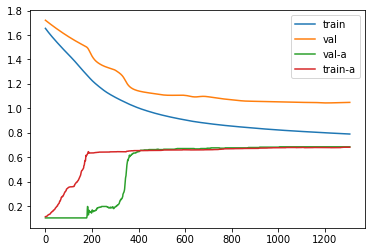

In [330]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.plot(history.history['val_accuracy'], label='val-a')
pyplot.plot(history.history['accuracy'], label='train-a')
pyplot.legend()
pyplot.show()